In [75]:
import os
import csv
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.stats as st

In [87]:
Fed = pd.read_csv("resources/Fedfunds.csv")
Mtg30 = pd.read_csv("resources/Mtg30.csv")
Mtg15 = pd.read_csv("resources/Mtg15.csv")
MtgFHA = pd.read_csv("resources/mtgFHA.csv")
Jumbo= pd.read_csv("resources/MtgJumbo.csv")

In [88]:
Fed = Fed
Fed['DATE'] = pd.to_datetime(Fed['DATE'])
Fed = Fed.groupby([Fed['DATE'].dt.strftime('%Y-%m')])['FED RATES'].last().reset_index()

Mtg30 = Mtg30
Mtg30['DATE'] = pd.to_datetime(Mtg30['DATE'])
Mtg30 = Mtg30.groupby([Mtg30['DATE'].dt.strftime('%Y-%m')])['Mtg30'].last().reset_index()

Mtg15 = Mtg15
Mtg15['DATE'] = pd.to_datetime(Mtg15['DATE'])
Mtg15 = Mtg15.groupby([Mtg15['DATE'].dt.strftime('%Y-%m')])['Mtg15'].last().reset_index()

MtgFHA = MtgFHA
MtgFHA['DATE'] = pd.to_datetime(MtgFHA['DATE'])
MtgFHA = MtgFHA.groupby([MtgFHA['DATE'].dt.strftime('%Y-%m')])['FHA 30'].last().reset_index()


Jumbo = Jumbo
Jumbo['DATE'] = pd.to_datetime(Jumbo['DATE'])
Jumbo = Jumbo.groupby([Jumbo['DATE'].dt.strftime('%Y-%m')])['Jumbo30'].last().reset_index()


In [85]:

#merge the fed rates and 30 year mtg rate
rates_df = pd.merge(Fed, Mtg30, on=["DATE"])

# Format to go to two decimal places, include a dollar sign, and use comma notation
#rates_df["FEDFUNDS"] = rates_df["FEDFUNDS"].astype(float).map("{:,.2f}".format)
#rates_df["30YRS"] = rates_df["30YRS"].astype(float).map("{:,.2f}".format)

rates_df["FED RATES"] = rates_df["FED RATES"].astype(float)
rates_df["Mtg30"] = rates_df["Mtg30"].astype(float)
# rates_df["Mtg15"] = rates_df["Mtg15"].astype(float)
# rates_df["FHA 30"] = rates_df["FHA 30'"].astype(float)
# rates_df["Jumbo30"] = rates_df["Jumbo30"].astype(float)
rates_df['DATE'] = pd.to_datetime(rates_df['DATE'])

rates_df = rates_df.loc[rates_df['DATE'] >= '1/1/2018']

rates_df.head()

,DATE,FED RATES,Mtg30
12,2018-01-01,1.41,4.15
13,2018-02-01,1.42,4.40
14,2018-03-01,1.51,4.44
15,2018-04-01,1.69,4.58
16,2018-05-01,1.70,4.56


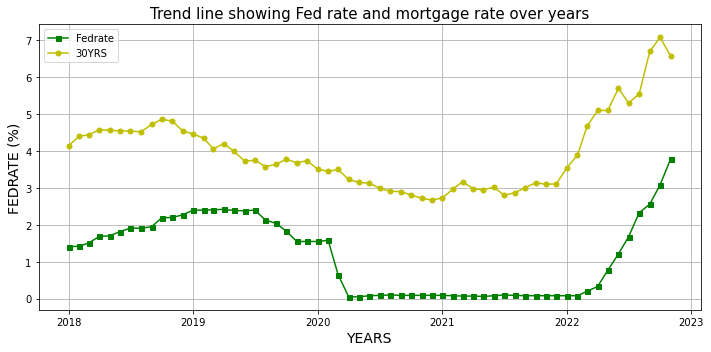

In [89]:

x1 = rates_df['DATE']
y1 = rates_df['FED RATES']
y2 = rates_df['Mtg30']

fig1, ax1 = plt.subplots(figsize=(10, 5))

plt.plot(x1, y1, markersize=5,marker="s",color="g", label= "Fedrate")
plt.plot(x1, y2, markersize=5,marker="o",color="y", label= "30YRS")
plt.title('Trend line showing Fed rate and mortgage rate over years',fontsize =15)
plt.xlabel('YEARS',fontsize =14)
plt.ylabel('FEDRATE (%)',fontsize =14)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()